Data: https://www.kaggle.com/nasa/meteorite-landings

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

Code to filter the meteorite data. Only needs to be run once.

In [79]:
meteorites = pd.read_csv("./data/meteorite-landings.csv", delimiter=",")
filtered_coords = (meteorites["Longitude"] >= -180) & (meteorites["Longitude"] <= 180) & ((meteorites["Longitude"] != 0) | (meteorites["Latitude"] != 0))
filtered_years = (meteorites["Year"] >= 860) & (meteorites["Year"] <= 2016)
filtered_mass = (meteorites["Mass"] >= 100)
filtered_meteorites = meteorites[filtered_coords & filtered_years & filtered_mass]
filtered_meteorites.drop("GeoLocation", axis=1, inplace=True)
# filtered_meteorites["Mass"] = filtered_meteorites["Mass"] / 1000
filtered_meteorites.to_csv("./data/cleansed-data.csv")
filtered_meteorites

C:\Users\benja\AppData\Local\Temp\ipykernel_18188\1904416170.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,ID,Type,Class,Mass,Fell,Year,Latitude,Longitude
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000
...,...,...,...,...,...,...,...,...,...
45709,Zhongxiang,30406,Valid,Iron,100000.0,Found,1981.0,31.20000,112.50000
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460


Code to plot the data

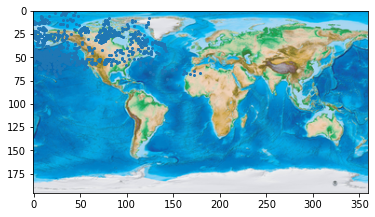

In [80]:
cleansed_meteorites = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
img = Image.open("images/map.jpg")
img.thumbnail((360, 200), Image.ANTIALIAS)
ax = plt.subplot()
ax.scatter(cleansed_meteorites["Longitude"], cleansed_meteorites["Latitude"], s=4)
# plt.figure(figsize=(20,15))
ax.imshow(img)
plt.show()
# plt.savefig("./images/testplot.png", format="png")

In [ ]:
fig = px.scatter_geo(filtered_meteorites,lat='Latitude',lon='Longitude',hover_name="Name",color="Mass",projection="natural earth")
fig.update_layout(title = 'Meteorite Landings Across the World', title_x=.5)
fig.show()

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = filtered_meteorites['Longitude'],
        lat = filtered_meteorites['Latitude'],
        text = "Mass " + filtered_meteorites['Mass'].astype(str),
        mode = 'markers',
        marker = dict(
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = filtered_meteorites['Mass'],
            cmax = filtered_meteorites['Mass'].max(),
            colorbar_title="Mass of Meteorites"
        )))
fig.update_layout(
        title = 'Meteorites in the US',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [95]:
filter_old = filtered_meteorites['Year'] > 1574
filtered_meteorites_per_year = filtered_meteorites[filter_old]
filtered_meteorites_per_year = filtered_meteorites_per_year['Year'].value_counts()
print(filtered_meteorites_per_year)
fig = px.scatter(filtered_meteorites_per_year,title="Number of Meteorites Per Year",
labels={
    "index": "Year",
    "value": "Number of Meteorites",
    "text": "hello"
}
)
fig.update_layout(showlegend=False)
fig.show()

2000.0    673
2001.0    605
1988.0    528
1999.0    493
1979.0    440
         ... 
1628.0      1
1787.0      1
1775.0      1
1820.0      1
1792.0      1
Name: Year, Length: 245, dtype: int64
